# Computer Vision: Image Classification of CIFAR-10 dataset using TensorFlow

**Domain:**Image Identification / Classification

**About:**
The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a collection of images that are commonly used to train machine learning and computer vision algorithms. It is one of the most widely used datasets for machine learning research.The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.

Computer algorithms for recognizing objects in photos often learn by example. CIFAR-10 is a set of images that can be used to teach a computer how to recognize objects. Since the images in CIFAR-10 are low-resolution (32x32), this dataset can allow researchers to quickly try different algorithms to see what works. Various kinds of convolutional neural networks tend to be the best at recognizing the images in CIFAR-10.

CIFAR-10 is a labeled subset of the 80 million tiny images dataset. When the dataset was created, students were paid to label all of the images.

[Information source: https://en.wikipedia.org/wiki/CIFAR-10]
[Image Source: https://www.cs.toronto.edu/~kriz/cifar.html]

**Problem Statement:** To predict correct label for each image given in test dataset.

**We will use GPU for this notebook to speed up process.**


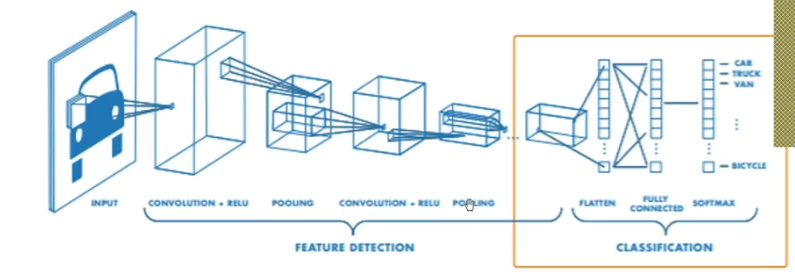

In [1]:
from IPython.display import Image
Image("Cifar10 1.png")

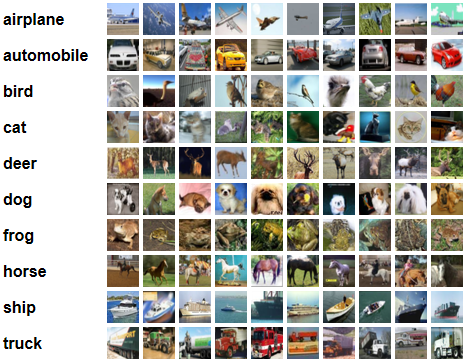

In [2]:
Image("CiFAR10 Examples.png")

# Importing packages

In [3]:
# importing tensorflow and keras

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical, plot_model

In [4]:
# Printing version of the TensorFlow

print(tf.__version__)

2.10.0


# Loading the Dataset

In [5]:
# Loading the dataset

Cifar10=keras.datasets.cifar10 # Loading the dataset

(xtrain,ytrain),(xtest,ytest)= Cifar10.load_data()

print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)
print(ytrain)

# see the size of the dataset
# print("Train Images Shape: %s \nTrain Labels: %s \nTest Images Shape: %s \nTest Labels: %s"  % (xtrain.shape, xtrain,xtest.shape,ytest))


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


Observations:
* There are 60,000 images. We assigned 10,000 to test dataset
* Images are black and white and is of 32 x 32 pixels
* Train Images: Array of 60,000 images in 32 X 32 pixel
* Train Labels: Integer array of 60,000 labels, value between 0 to 9
* Test Images: Array of 10,000 images in 32 X 32 pixel
* Test Labels: Integer array of 10,000 labels, value between 0 to 9
* Each image mapped to a single label
* Each integer value in label array represent clothing item

In [6]:
# Defining array. Each item of array represent integer value of labels. 10 clothing item for 10 integer label.

class_names =['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
print(class_names)

['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


# Evaluation of the data

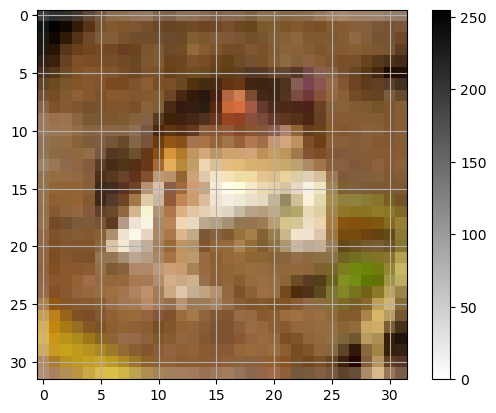

Class ID: [6] and Class name: Frog


In [7]:
# inspect the data in the array

index=0 # change this number 
plt.imshow(xtrain[index], cmap=plt.cm.binary) # printing 10th image. You may use cmap='gray'
plt.colorbar() # shows the bar on the right side of the image
plt.grid(True) # will shot the grid
plt.show()
print("Class ID: %s and Class name: %s" % (ytrain[index], class_names[ytrain[index][0]]))

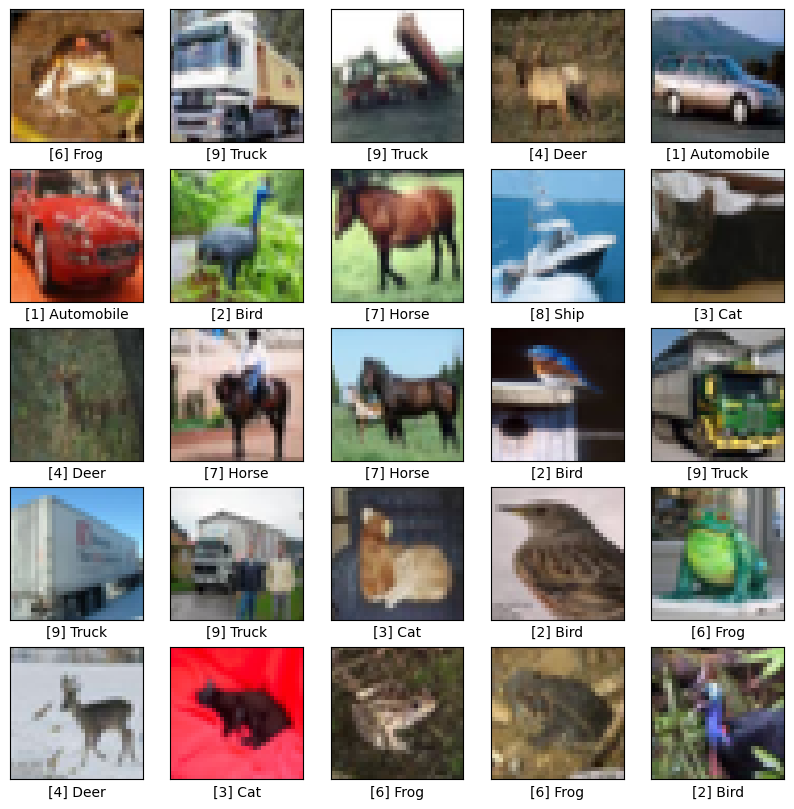

In [8]:
# display the first 25 images from traing set

plt.figure(figsize=(10,10))
for i in range(25): # 25 images
  plt.subplot(5,5,i+1) # matrix of 5 X 5 array
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(xtrain[i], cmap=plt.cm.binary) # printing binary/black and white image
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
  plt.xlabel("%s %s" % (ytrain[i], class_names[ytrain[i][0]])) # Assigning name to each image
plt.show()

# Data Preparation

## Scaling the image values

In [9]:
# Pixel value of the image falls between 0 to 255.

xtrain = xtrain/255 # So, we are scale the value between 0 to 1 before by deviding each value by 255
print(xtrain.shape)

xtest = xtest/255 # So, we are scale the value between 0 to 1 before by deviding each value by 255
print(xtest.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


## One hot encoding of the labels
- This is NOT required in two-class classification problem
- This is REQUIRED in multi-class classification problem
- This is 10 class classification problem so after one hot encoding it will generate 10 columns i.e. 10 output nurons for each label

In [10]:
# One hot encoding of the labels.
#(generally we do one hot encoding of the features in EDA but in this case we are doing it for labels)

# Before one hot encoding
print("ytrain Shape: %s and value: %s" % (ytrain.shape, ytrain))
print("ytest Shape: %s and value: %s" % (ytest.shape, ytest))

ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)

# After one hot encoding
print("ytrain Shape: %s and value: %s" % (ytrain.shape, ytrain[0]))
print("ytest Shape: %s and value: %s" % (ytest.shape, ytest[1]))

ytrain Shape: (50000, 1) and value: [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
ytest Shape: (10000, 1) and value: [[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]
ytrain Shape: (50000, 10) and value: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
ytest Shape: (10000, 10) and value: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


# Modelling - Model on CNN
- There are 2 ways to program CNN with keras:
  - Sequential approach: Here, we generally add layers in sequence.
  - Modular approach: This is more important. This more dynamic, cusotmized, moulded and easy to explore. We generally use this.

Effectiveness in both the approach will remain same.

We are creating this model based on lecun-99
Source: http://yann.lecun.com/exdb/publis/pdf/lecun-99.pdf



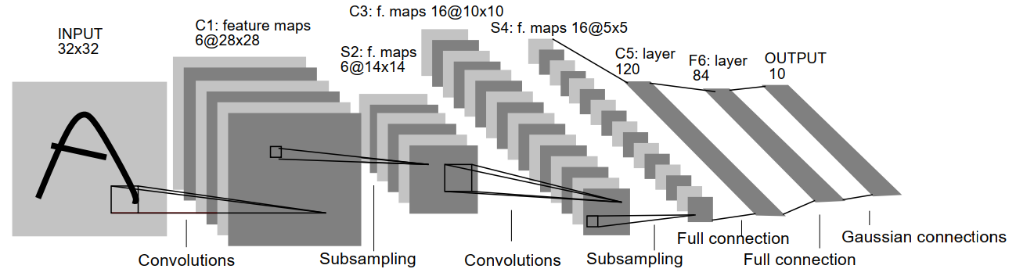

In [11]:
from IPython.display import Image
Image("Lecun.png")

## Building model

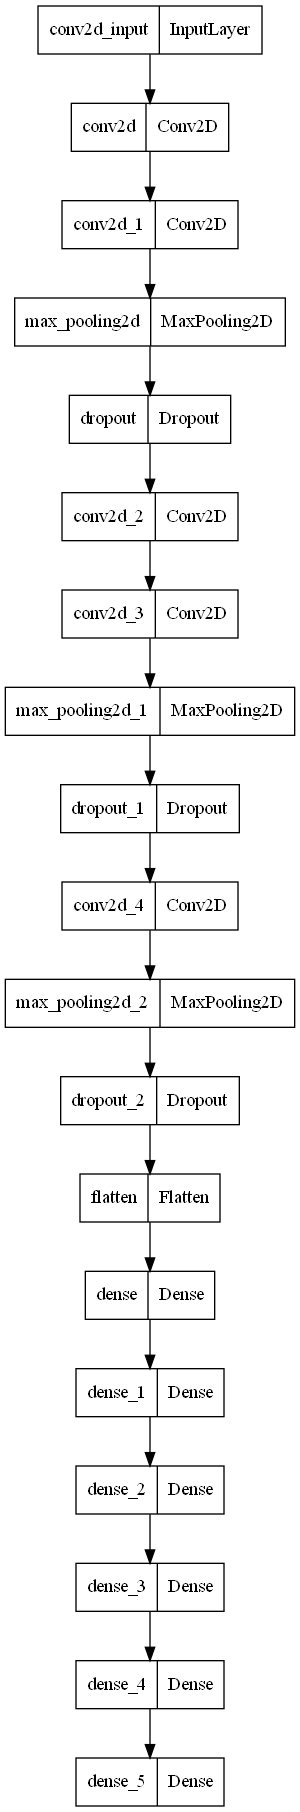

In [12]:
# Modelling - Model on CNN

from tensorflow.keras import models, layers
from keras.layers import Conv2D, MaxPooling2D, Flatten , Dense, Activation,Dropout

# create a sequential model i.e. empty neural network which has no layers in it.
model=models.Sequential()

#==================== Feature Detection / extraction Block ====================#

# Add first convolutional block - To deal with images we use Conv2D and for colour images and shape use Conv3D
#model.add(layers.Conv2D(filters=6, kernal_size(3,3), input_shape=(32,32,1), activation='relu'))
# in the first block we need to mention input_shape
model.add(layers.Conv2D(64,(3,3),input_shape=(32,32,3),activation='relu'))
model.add(layers.Conv2D(64,(3,3),input_shape=(32,32,3),activation='relu'))
# Add the max pooling layer
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Add Second convolutional block
#model.add(layers.Conv2D(filters=6, kernal_size(3,3), activation='relu'))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
# Add the max pooling layer
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Add Third convolutional block
#model.add(layers.Conv2D(filters=6, kernal_size(3,3), activation='relu'))
model.add(layers.Conv2D(256,(3,3),activation='relu'))
# model.add(layers.Conv2D(256,(3,3),activation='relu'))
# Add the max pooling layer
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


#==================== Transition Block (from feature detection to classification) ====================#

# Add Flatten layer. Flatten simply converts matrics to array
model.add(layers.Flatten(input_shape=(32,32))) # this will flatten the image and after this Classification happens

#==================== Classification Block ====================#

# Classification segment - fully connected network
# The Dence layer does classification and is deep neural network. Dense layer always accept the array.
model.add(layers.Dense(128, activation='relu')) # as C5 layer in above image. 
model.add(layers.Dense(100, activation='relu')) # as C5 layer in above image. 
model.add(layers.Dense(80, activation='relu')) # as C5 layer in above image. 
model.add(layers.Dense(60, activation='relu')) # as C5 layer in above image
model.add(layers.Dense(40, activation='relu')) # as C5 layer in above image
# this 120 is hyper parameter whcih is number of neuron 
#model.add(layers.Dense(84, activation='relu'))# as F6 layer in aboave image

# Add the output layer
model.add(layers.Dense(10, activation='softmax')) # as Output layer in above image. The output layer normally have softmax activation

# Ploting the Model
plot_model(model)

In [13]:
# from tensorflow.keras import models, layers
# from tensorflow.keras.optimizers import Adam

# # create a sequential model i.e. empty neural network which has no layers in it.
# model = models.Sequential()

# #==================== Feature Detection / extraction Block ====================#

# # Add first convolutional block
# model.add(layers.Conv2D(64, kernel_size=(3,3), input_shape=(32,32,3), activation='relu'))
# model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
# # Add the max pooling layer
# model.add(layers.MaxPooling2D(pool_size=(2,2)))
# model.add(layers.Dropout(0.25))

# # Add Second convolutional block
# model.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
# model.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
# # Add the max pooling layer
# model.add(layers.MaxPooling2D(pool_size=(2,2)))
# model.add(layers.Dropout(0.25))

# # Add Third convolutional block
# model.add(layers.Conv2D(256, kernel_size=(3,3), activation='relu'))
# # Add the max pooling layer
# model.add(layers.MaxPooling2D(pool_size=(2,2)))
# model.add(layers.Dropout(0.25))

# #==================== Transition Block (from feature detection to classification) ====================#

# # Add Flatten layer. Flatten simply converts matrices to array
# model.add(layers.Flatten())

# #==================== Classification Block ====================#

# # Classification segment - fully connected network
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dense(100, activation='relu'))
# model.add(layers.Dense(80, activation='relu'))
# model.add(layers.Dense(60, activation='relu'))
# model.add(layers.Dense(40, activation='relu'))

# # Add the output layer
# model.add(layers.Dense(10, activation='softmax'))

# # Compile the model with Adam optimizer and weight decay
# model.compile(optimizer=Adam(learning_rate=0.001, decay=1e-5),
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

## Compile the model

In [15]:
# Compile the model

# if we use softmax activation in output layer then best fit optimizer is categorical_crossentropy
# for sigmoid activation in output layer then loss will be binary_crossentropy

from tensorflow.keras.optimizers import Adam

# Compile the model with Adam optimizer and weight decay
model.compile(optimizer=Adam(learning_rate=0.001, decay=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

 
# if we do not go for One Hot Encoding then use loss='sparse_categorical_crossentropy'

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 128)       147584    
                                                        

Reading the summary:
- There are 5 computational layers i.e. all the layers where param value is non-zero that is why it is called LeNet-5.
- Params are weights and bias
- the value 60 = 6 filters X  kernal size 9 i.e.(3 X 3) = 54 + 6 bias (equal to number of filters) = 60
- the value 550 = 10 filters X  kernal size 9 i.e.(3 X 3) = 90 X 6 filters of earliar layer = 540 + 10 bias (equal to number of filters) = 550
- In case of Dense layer 30120 = 250 X 120 = 30,000 + 120 bias
- In case of Dense layer 10164 = 120 X 84 = 10080 + 84 bias

## Train the model

In [16]:
# Train the model 
# Using GPU really speeds up this code
xtrain2=xtrain.reshape(50000,32,32,3)
xtest2=xtest.reshape(10000,32,32,3)

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

model.fit(xtrain2,ytrain,epochs=40,batch_size=56,verbose=True,validation_data=(xtest2,ytest))

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)
Epoch 1/40
893/893 [==============================] - 91s 100ms/step - loss: 1.8453 - accuracy: 0.2936 - val_loss: 1.5402 - val_accuracy: 0.4293
Epoch 2/40
893/893 [==============================] - 89s 99ms/step - loss: 1.4091 - accuracy: 0.4847 - val_loss: 1.2641 - val_accuracy: 0.5384
Epoch 3/40
893/893 [==============================] - 89s 100ms/step - loss: 1.2242 - accuracy: 0.5657 - val_loss: 1.1020 - val_accuracy: 0.6169
Epoch 4/40
893/893 [==============================] - 90s 101ms/step - loss: 1.0991 - accuracy: 0.6134 - val_loss: 1.0045 - val_accuracy: 0.6529
Epoch 5/40
893/893 [==============================] - 89s 100ms/step - loss: 1.0179 - accuracy: 0.6440 - val_loss: 0.9676 - val_accuracy: 0.6689
Epoch 6/40
893/893 [==============================] - 89s 100ms/step - loss: 0.9506 - accuracy: 0.6698 - val_loss: 0.9078 - val_accuracy: 0.6845
Epoch 7/40
893/893 [==============================] - 90s 101ms/step 

# Evaluation of the model

## Evaluating model accuracy

In [18]:
# evaluate accuracy of the model

test_loss, test_acc = model.evaluate(xtest2, ytest)
print("accuracy:", test_acc)

313/313 [==============================] - 6s 19ms/step - loss: 0.6920 - accuracy: 0.7785
accuracy: 0.7785000205039978


Observation:
* there is a very little gap between accracy of train and test model i.e. 0.9881 and 0.9826 that means model is almost perfect... very little overfitting.

## Predicting label

In [19]:
# predicting lable for test_images

predictions=model.predict(xtest2)

# Prediction of the 1st result. It will show the 10 predictions of labels for test image
print("1. Prediction array: %s" % (predictions[0]))

# we will verify that which result for label has highest confidence
print("2. Label number having highest confidence in prediction array: %s" % (np.argmax(predictions[0])))

# let us verify what is the label in test_labels.
print("3. Actual label in dataset: %s" % (ytest[0]))

313/313 [==============================] - 6s 19ms/step
1. Prediction array: [1.3236796e-05 2.5634663e-05 2.5997236e-03 9.5738560e-01 3.8049856e-04
 5.8153048e-03 3.2278415e-02 3.2352540e-04 7.6944637e-04 4.0854211e-04]
2. Label number having highest confidence in prediction array: 3
3. Actual label in dataset: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


Observation:
* This means model shows most confidence about 1st test_image is 'Ankle boot' ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])
* test_labels[0] also gives result as 9 (i.e. 'Ankle boot'). So, the prediction is correct. The data is one hot encoded so there is 1 at the last


# Testing the model on data

## Creating a function to verify prediction is True or False

In [20]:
# creating a funtion which will help to verify the prediction is true of not

def plot_image(i, predictions_array, true_label, img): # taking index and 3 arrays viz. prediction array, true label array and image array
  
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary) # showing b/w image

  predicted_label=np.argmax(predictions_array)
  true_label=np.argmax(true_label)

  # print(predicted_label)
  # print(true_label)
  
  if predicted_label == true_label: #setting up label color
    color='blue' # correct then blue colour
    
  else:
    color='red' # wrong then red colour

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color=color)
  
# function to display bar chart showing whether image prediction is how much correct  
def plot_value_array(i, predictions_array, true_label): # taking index along with predictions and true label array
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot=plt.bar(range(10), predictions_array, color='gray')
  plt.ylim([0,1])
  predicted_label=np.argmax(predictions_array)
  true_label=np.argmax(true_label)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

## Test for single image

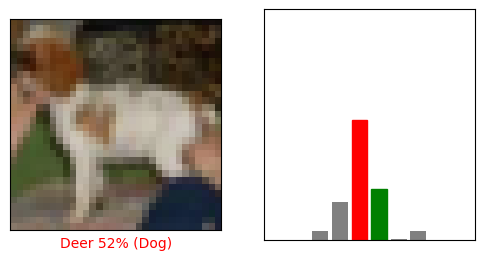

In [21]:
# call the function

# defining parameters to pass to function
i=12 # image number 56. You may change value of i for play around
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)

plot_image(i, predictions, ytest, xtest)
plt.subplot(1,2,2)
plot_value_array(i, predictions, ytest)
plt.show()

## Test for single image

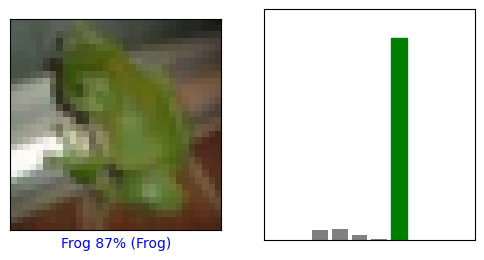

In [22]:
# call the function

# defining parameters to pass to function
i=7 # image number 5. You may change value of i for play around
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, ytest, xtest)
plt.subplot(1,2,2)
plot_value_array(i, predictions, ytest)
plt.show()

## Test for single image

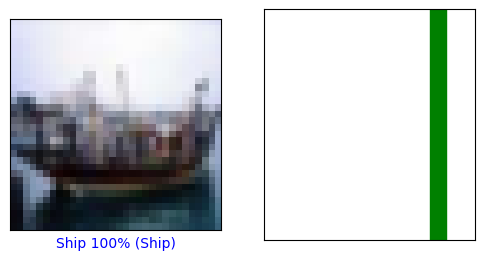

In [23]:
# call the function

# defining parameters to pass to function
i=18 # image number 12. You may change value of i for play around
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, ytest, xtest)
plt.subplot(1,2,2)
plot_value_array(i, predictions, ytest)
plt.show()

(32, 32, 3)
(1, 32, 32, 3)
1/1 [==============================] - 0s 26ms/step
[[1.43281125e-06 4.78212371e-07 9.46309592e-04 8.02848372e-04
  1.01156026e-01 5.49649631e-05 8.97011936e-01 1.91549389e-05
  3.11836038e-06 3.64571156e-06]]


6

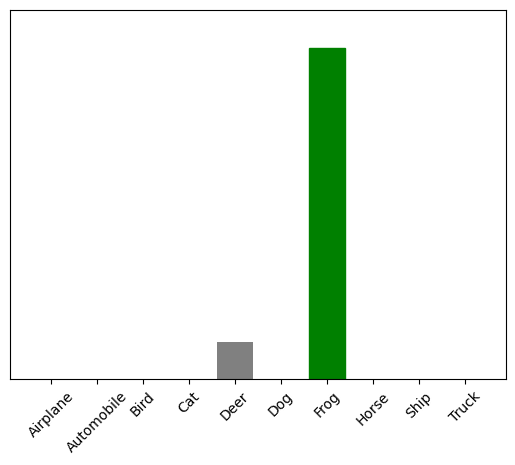

In [24]:
# verification our prediction on single image

i=4 # image number 0. You may change value of i for play around
img = xtest2[i]
print(img.shape)

img=(np.expand_dims(img,0))
print(img.shape)

predictions_single = model.predict(img)
print(predictions_single)

plot_value_array(i, predictions,ytest)
_ = plt.xticks(range(10), class_names,rotation=45)

np.argmax(predictions_single[0])

## Verifying several images

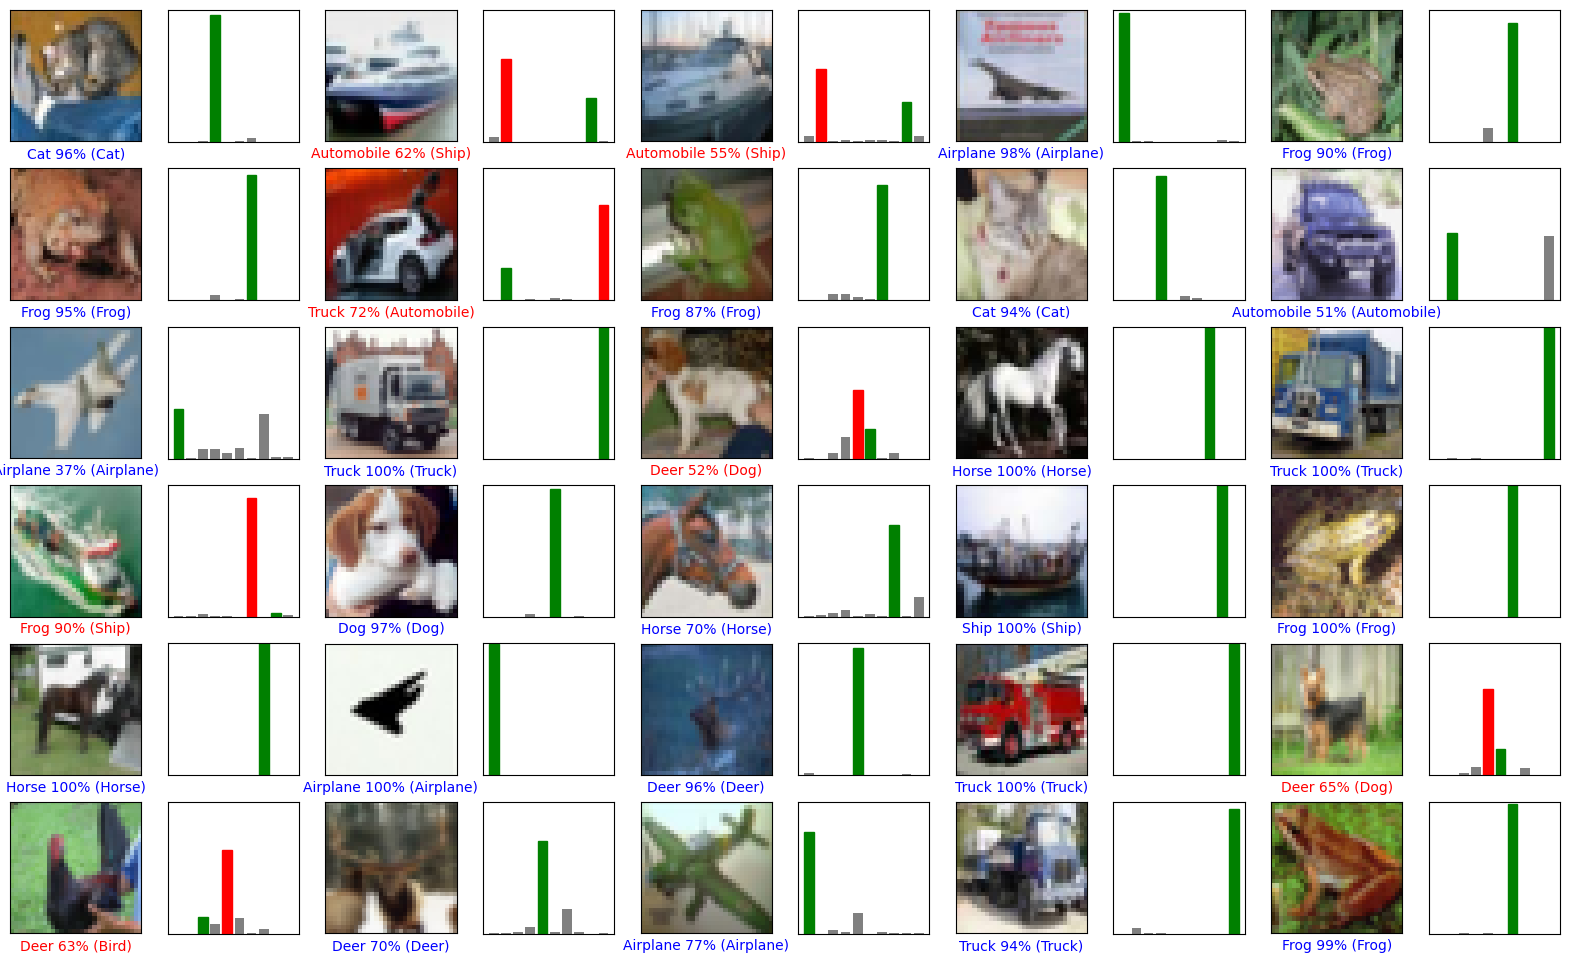

In [25]:
# verification of several images

num_rows=6
num_cols=5
num_images=num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i,predictions, ytest, xtest)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, ytest)
plt.show()

# Conclusions

* With a complex sequential model with multiple convolution layers and 40 epochs for the training, we obtained an accuracy 0.85 for test prediction. 
* After investigating the validation accuracy and loss, we understood that the model is little overfitting.
* Model may be retrained with Dropout layers to reduce overfitting.
* Most of the images can be identified except in few cases for Deer and Automobile. Model is poor at identifying Deer.

In [26]:
print("Notebook completed!")

Notebook completed!


In [17]:
from tensorflow.keras.models import load_model, save_model

# Assuming 'model' is your trained model
# Save the model to a HDF5 file
save_model(model, 'trained_model.keras')

# Later, to load the model
loaded_model = load_model('trained_model.keras')